# Importing the necessary libraries

In [1]:
# importing libraries
import pandas            as pd                       # data science essentials
import matplotlib.pyplot as plt                      # data visualization
import seaborn           as sns                      # enhanced data viz
import numpy             as np                       # mathematical essential
from sklearn.model_selection import train_test_split # train-test split
from sklearn.linear_model import LogisticRegression  # logistic regression
import statsmodels.formula.api as smf                # logistic regression
from sklearn.metrics import confusion_matrix         # confusion matrix
from sklearn.metrics import roc_auc_score            # auc score
from sklearn.neighbors import KNeighborsClassifier   # KNN for classification
from sklearn.neighbors import KNeighborsRegressor    # KNN for regression
from sklearn.preprocessing import StandardScaler     # standard scaler
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import plot_tree                   # tree plots
from sklearn.metrics import make_scorer              # customizable scorer
from sklearn.model_selection import RandomizedSearchCV     # hyperparameter tuning
from sklearn.ensemble import RandomForestClassifier     # random forest
from sklearn.ensemble import GradientBoostingClassifier # gbm


#loading data to Python
file = "../GOT_character_predictions.xlsx"

got = pd.read_excel(io = file)

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)

got.head(n=5)

,S.No,name,title,culture,dateOfBirth,mother,father,heir,house,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
0,1,Viserys II Targaryen,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,0,0,0,0,0,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
1,2,Walder Frey,Lord of the Crossing,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
2,3,Addison Hill,Ser,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
3,4,Aemma Arryn,Queen,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,0,0,0,0,0,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
4,5,Sylva Santagar,Greenstone,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1


In [2]:
#Printing number of observations and features
print(f"""
Size of Original Dataset
------------------------
Observations: {got.shape[0]}
Features:     {got.shape[1]} 
""")


Size of Original Dataset
------------------------
Observations: 1946
Features:     25 



In [3]:
#checking for missing values
got.isnull().sum()

S.No                             0
name                             0
title                         1008
culture                       1269
dateOfBirth                   1513
mother                        1925
father                        1920
heir                          1923
house                          427
spouse                        1670
book1_A_Game_Of_Thrones          0
book2_A_Clash_Of_Kings           0
book3_A_Storm_Of_Swords          0
book4_A_Feast_For_Crows          0
book5_A_Dance_with_Dragons       0
isAliveMother                 1925
isAliveFather                 1920
isAliveHeir                   1923
isAliveSpouse                 1670
isMarried                        0
isNoble                          0
age                           1513
numDeadRelations                 0
popularity                       0
isAlive                          0
dtype: int64

In [4]:
#checking what dtype is my data
got.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   S.No                        1946 non-null   int64  
 1   name                        1946 non-null   object 
 2   title                       938 non-null    object 
 3   culture                     677 non-null    object 
 4   dateOfBirth                 433 non-null    float64
 5   mother                      21 non-null     object 
 6   father                      26 non-null     object 
 7   heir                        23 non-null     object 
 8   house                       1519 non-null   object 
 9   spouse                      276 non-null    object 
 10  book1_A_Game_Of_Thrones     1946 non-null   int64  
 11  book2_A_Clash_Of_Kings      1946 non-null   int64  
 12  book3_A_Storm_Of_Swords     1946 non-null   int64  
 13  book4_A_Feast_For_Crows     1946 

In [5]:
#creating a copy of the dataframe
got_c = pd.DataFrame.copy(got)

In [6]:
#installing gender_guesser
#%pip install gender_guesser

# Feature Engineering the x-variables

In [7]:
#Gender guesser

# placeholder list
placeholder_lst = []

# looping over each email address
for index, col in got_c.iterrows():
    
    # splitting email domain at ' '
    split_name= got_c.loc[index, 'name'].split(sep = ' ')
    
    # appending placeholder_lst with the results
    placeholder_lst.append(split_name)
    

# converting placeholder_lst into a DataFrame 
name_df = pd.DataFrame(placeholder_lst)


# displaying the results
name_df.head(n=15)

,0,1,2,3,4,5
0,Viserys,II,Targaryen,None,None,None
1,Walder,Frey,None,None,None,None
2,Addison,Hill,None,None,None,None
3,Aemma,Arryn,None,None,None,None
4,Sylva,Santagar,None,None,None,None
5,Tommen,Baratheon,None,None,None,None
6,Valarr,Targaryen,None,None,None,None
7,Viserys,I,Targaryen,None,None,None
8,Wilbert,None,None,None,None,None
9,Wilbert,Osgrey,None,None,None,None


In [8]:
#Renaming the new columns 
name_df.columns = ['first_name', 'lastname1','lastname2', 'lastname3', 'lastname4', 'lastname5']

#concatenate the new columns 
got_c = pd.concat([got_c, name_df['first_name']],
                  axis = 1)
got_c = pd.concat([got_c, name_df['lastname1']],
                  axis = 1)
got_c = pd.concat([got_c, name_df['lastname2']],
                  axis = 1)

# guessing gender based on (given) name
import gender_guesser.detector as gender

# placeholder list
placeholder_lst2 =[]


# looping to guess gender
#for name in got_c['first_name']:
   # guess = gender.Detector().get_gender(name)
   # print(guess)
    #placeholder_lst.append(guess)


# converting list into a series
#got_c['gender_guess'] = pd.Series(placeholder_lst)


# checking results
#got_c.head(n = 15)

In [9]:
#print(placeholder_lst)

In [10]:
#results from the gender guesser
got_c['gender_guess'] = pd.Series(['unknown', 'unknown', 'andy', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'male', 'male', 'mostly_male', 'mostly_male', 'mostly_male', 'mostly_male', 'mostly_male', 'mostly_male', 'unknown', 'male', 'unknown', 'unknown', 'male', 'male', 'female', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'male', 'male', 'andy', 'andy', 'unknown', 'andy', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'male', 'male', 'unknown', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'mostly_male', 'male', 'mostly_male', 'mostly_male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'mostly_male', 'unknown', 'unknown', 'male', 'female', 'andy', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'mostly_female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'andy', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'male', 'female', 'female', 'female', 'female', 'female', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'mostly_female', 'female', 'unknown', 'mostly_female', 'unknown', 'female', 'unknown', 'female', 'unknown', 'male', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'andy', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'male', 'male', 'male', 'male', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'female', 'female', 'female', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_female', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'male', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'mostly_male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 
                'unknown', 'unknown', 'mostly_male', 'female', 'male', 'male', 'male', 'female', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'male', 'male', 'male', 'female', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'andy', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'female', 'male', 'unknown', 'unknown', 'female', 'male', 'unknown', 'male', 'unknown', 'unknown', 'male', 'female', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'female', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'male', 'unknown', 'male', 'male', 'unknown', 'unknown', 'male', 'male', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'female', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'female', 'female', 'female', 'unknown', 'unknown', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_female', 'mostly_female', 'mostly_female', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'female', 'male', 'male', 'male', 'male', 'unknown', 'female', 'female', 'female', 'unknown', 'mostly_male', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'female', 'male', 'female', 'unknown', 'unknown', 'female', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'unknown', 'female', 'unknown', 'female', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'female', 'unknown', 'male', 'unknown', 'unknown', 'mostly_female', 'male', 'female', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'female', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 
                'male', 'unknown', 'male', 'male', 'female', 'mostly_female', 'female', 'mostly_female', 'mostly_female', 'mostly_female', 'mostly_female', 'mostly_female', 'mostly_female', 'unknown', 'unknown', 'female', 'female', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'female', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'female', 'unknown', 'female', 'unknown', 'unknown', 'female', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'female', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'female', 'unknown', 'unknown', 'male', 'male', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'female', 'mostly_male', 'unknown', 'female', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'male', 'male', 'male', 'male', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'male', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'male', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'female', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'female', 'unknown', 'female', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'mostly_male', 'male', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'female', 'female', 'female', 'male', 'male', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'male', 'unknown', 'female', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'male', 'male', 'andy', 'male', 'male', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'female', 'unknown', 'male', 'male', 'male', 'male', 'male', 'male', 'mostly_male', 'mostly_male', 'mostly_male', 'mostly_male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'male', 'unknown', 'male', 'male', 'unknown', 'male', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'female', 'female', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'male', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'female', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 
                'unknown', 'male', 'unknown', 'unknown', 'mostly_female', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_female', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'male', 'mostly_female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'female', 'unknown', 'female', 'unknown', 'female', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'andy', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'female', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'mostly_female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'male', 'male', 'unknown', 'male', 'unknown', 'male', 'male', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'male', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'mostly_male', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'mostly_female', 'unknown', 'unknown', 'unknown', 'female', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'female', 'male', 'mostly_male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown'])

In [11]:
#getting dummy variables for gender_guess
#Creating a new column named gender_unkown and setting it as dummy
got_c['gender_unknown'] = 0
for row, column in got_c.iterrows():
    if got_c.loc[row, 'gender_guess'] == 'unknown' or got_c.loc[row, 'gender_guess']== 'andy':
        got_c.loc[row, 'gender_unknown'] = 1
    elif got_c.loc[row, 'gender_guess'] != 'unknown':
        got_c.loc[row, 'gender_unknown'] = 0 
        
#Creating a new column named gender_female and setting it as dummy        
got_c['gender_female'] = 0
for row, column in got_c.iterrows():
    if got_c.loc[row, 'gender_guess'] =='female' or got_c.loc[row, 'gender_guess'] =='mostly_female':
        got_c.loc[row,'gender_female'] = 1
    elif got_c.loc[row, 'gender_guess'] != 'female' or got_c.loc[row, 'gender_guess'] != 'mostly_female':
        got_c.loc[row, 'gender_female']= 0 

#Creating a new column named gender_male and setting it as dummy
got_c['gender_male'] = 0
for row, column in got_c.iterrows():
    if got_c.loc[row,'gender_guess'] == 'male' or got_c.loc[row, 'gender_guess']=='mostly_male':
        got_c.loc[row, 'gender_male'] = 1
    elif got_c.loc[row,'gender_guess'] != 'male' or got_c.loc[row, 'gender_guess'] !='mostly_male':
        got_c.loc['gender_male'] = 0


        

In [12]:
#printing the dataset to see the dummy variables created 
got_c.head(n = 10)

,S.No,name,title,culture,dateOfBirth,mother,father,heir,house,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,first_name,lastname1,lastname2,gender_guess,gender_unknown,gender_female,gender_male
0,1,Viserys II Targaryen,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,0,0,0,0,0,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0,Viserys,II,Targaryen,unknown,1,0,0
1,2,Walder Frey,Lord of the Crossing,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1,Walder,Frey,None,unknown,1,0,0
2,3,Addison Hill,Ser,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1,Addison,Hill,None,andy,1,0,0
3,4,Aemma Arryn,Queen,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,0,0,0,0,0,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0,Aemma,Arryn,None,unknown,1,0,0
4,5,Sylva Santagar,Greenstone,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1,Sylva,Santagar,None,female,0,1,0
5,6,Tommen Baratheon,NaN,NaN,NaN,Cersei Lannister,Robert Baratheon,Myrcella Baratheon,NaN,NaN,0,0,0,0,0,1.0,1.0,1.0,NaN,0,0,NaN,5,1.000000,1,Tommen,Baratheon,None,unknown,1,0,0
6,7,Valarr Targaryen,Hand of the King,Valyrian,183.0,NaN,NaN,NaN,House Targaryen,Kiera of Tyrosh,0,0,0,0,0,NaN,NaN,NaN,1.0,1,1,26.0,0,0.431438,0,Valarr,Targaryen,None,unknown,1,0,0
7,8,Viserys I Targaryen,NaN,NaN,NaN,Alyssa Targaryen,Baelon Targaryen,Rhaenyra Targaryen,NaN,NaN,0,0,0,0,0,1.0,1.0,1.0,NaN,0,0,NaN,5,0.678930,0,Viserys,I,Targaryen,unknown,1,0,0
8,9,Wilbert,Ser,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.006689,0,Wilbert,None,None,male,0,0,1
9,10,Wilbert Osgrey,Ser,NaN,NaN,NaN,NaN,NaN,House Osgrey,NaN,0,0,0,0,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.020067,1,Wilbert,Osgrey,None,male,0,0,1


In [13]:
#creating a histogram to visualize the mean and median of age
#setting the size of the histogram
#fig, ax = plt.subplots(figsize =[8, 5])

#sns.histplot(data = got_c,
            #x    = 'age',
            #bins = 'fd',
            #kde  = True,
            #color = 'black')

#label title, x-axis, y-axis
#plt.title(label = 'Distribution of Age')
#plt.xlabel(xlabel = 'Age')
#plt.ylabel(ylabel = 'Frecuency')

#checking the position of the mean
#plt.axvline(x = got_c['age'].mean(),
            #color = 'red')


#checking the position of the median 
#plt.axvline(x = got_c['age'].median(),
            #color = 'blue')


# this adds a legend
#plt.legend(labels =  ['mean', 'median'])


# these compile and display the plot so that it is formatted as expected
#plt.tight_layout()
#plt.show()

In [14]:
#getting the mean and median of age
print(got_c['age'].mean())
print(got_c['age'].median())

-1290.5829493087558
27.0


In [15]:
#new variable that contains the median age
age_median = got_c['age'].median()

#filling missing values
got_c['age'].fillna(value = age_median,
                    inplace = True)

#checking there are no more missing values
print(got_c['age'].isnull().sum())

0


In [16]:
#creating a histogram to visualize the mean and median of dateOfBirth
#setting the size of the histogram
#fig, ax = plt.subplots(figsize =[8, 5])

#sns.histplot(data = got_c,
            #x    = 'dateOfBirth',
            #bins = 'fd',
            #kde  = True,
            #color = 'black')

#label title, x-axis, y-axis
#plt.title(label = 'Distribution of Age')
#plt.xlabel(xlabel = 'Date Of Birth')
#plt.ylabel(ylabel = 'Frecuency')

#checking the position of the mean
#plt.axvline(x = got_c['dateOfBirth'].mean(),
            #color = 'red')


#checking the position of the median 
#plt.axvline(x = got_c['dateOfBirth'].median(),
            #color = 'blue')


# this adds a legend
#plt.legend(labels =  ['mean', 'median'])


# these compile and display the plot so that it is formatted as expected
#plt.tight_layout()
#plt.show()

In [17]:
#getting the mean and median of dateOfBirth
print(got_c['dateOfBirth'].mean())
print(got_c['dateOfBirth'].median())

1573.7304147465438
268.0


In [18]:
#new variable that contains the median age
birth_median = got_c['dateOfBirth'].median()

#filling missing values
got_c['dateOfBirth'].fillna(value = birth_median,
                    inplace = True)

#checking there are no more missing values
print(got_c['dateOfBirth'].isnull().sum())

0


In [19]:
#filling numerical missing values
got_c['isAliveMother'].fillna(value = 0,
                              inplace = True)
got_c['isAliveFather'].fillna(value = 0,
                              inplace = True)
got_c['isAliveHeir'].fillna(value = 0, 
                            inplace = True)
got_c['isAliveSpouse'].fillna(value = 0, 
                             inplace = True)

#filling categorical missing values
got_c['title'].fillna(value = 'unknown',
                      inplace = True)
got_c['mother'].fillna(value = 'unknown',
                      inplace = True)
got_c['father'].fillna(value = 'unknown',
                     inplace = True)
got_c['heir'].fillna(value = 'unknown',
                    inplace = True)

In [20]:
#creating a list to inpute the variable house
houses_lst = []

#creating a for loop to reorganize the variable house using house column and lastname1
for row, column in got_c.iterrows():
    if got_c.loc[row, 'house'] == 'House Stark' or got_c.loc[row, 'lastname1']== 'Stark':
        got_c.loc[row,'houses_lst'] = 'Stark'
    elif got_c.loc[row, 'house'] == 'House Targaryen' or got_c.loc[row, 'lastname1'] == 'Targaryen' or got_c.loc[row,'lastname2'] == 'Targaryen':
        got_c.loc[row, 'houses_lst'] = 'Targaryen'
    elif got_c.loc[row, 'house'] == 'House Lannister' or got_c.loc[row, 'lastname1'] == 'Lannister':
        got_c.loc[row, 'houses_lst'] = 'Lannister'
    else:
        got_c.loc[row, 'houses_lst'] = 'Other'

In [21]:
# placeholder list
got_c['house_stark']=0

#Creating a new column named house_stark and setting it as dummy
for row, column in got_c.iterrows():
    if got_c.loc[row, 'houses_lst'] == 'Stark':
        got_c.loc[row, 'house_stark'] = 1
    elif got_c.loc[row, 'houses_lst'] != 'Stark':
        got_c.loc[row, 'house_stark'] = 0 

#Creating a new column named house_targaryen and setting it as dummy
got_c['house_targaryen']=0 
for row, column in got_c.iterrows():
    if got_c.loc[row, 'houses_lst'] == 'Targaryen':
        got_c.loc[row, 'house_targaryen'] =1
    elif got_c.loc[row, 'houses_lst'] != ' Targaryen':
        got_c.loc[row, 'house_targaryen']= 0

#Creating a new column named house_lannister and setting it as dummy
got_c['house_lannister']=0 
for row, column in got_c.iterrows():
    if got_c.loc[row, 'houses_lst'] == 'Lannister':
        got_c.loc[row, 'house_lannister'] = 1
    elif got_c.loc[row, 'houses_lst'] != ' Lannister':
        got_c.loc[row, 'house_lannister'] = 0

#Creating a new column named house_other and setting it as dummy        
got_c['house_other']=0
for row, column in got_c.iterrows():
    if got_c.loc[row, 'houses_lst'] == 'Other':
        got_c.loc[row, 'house_other'] = 1
    elif got_c.loc[row, 'houses_lst'] != 'Other':
        got_c.loc[row, 'house_other'] = 0
        
    


In [22]:
#printing the first 10 rows
got_c.head(n=10)

,S.No,name,title,culture,dateOfBirth,mother,father,heir,house,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,first_name,lastname1,lastname2,gender_guess,gender_unknown,gender_female,gender_male,houses_lst,house_stark,house_targaryen,house_lannister,house_other
0,1,Viserys II Targaryen,unknown,NaN,268.0,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,0,0,0,0,0,1.0,0.0,0.0,0.0,0,0,27.0,11,0.605351,0,Viserys,II,Targaryen,unknown,1,0,0,Targaryen,0,1,0,0
1,2,Walder Frey,Lord of the Crossing,Rivermen,208.0,unknown,unknown,unknown,House Frey,Perra Royce,1,1,1,1,1,0.0,0.0,0.0,1.0,1,1,97.0,1,0.896321,1,Walder,Frey,None,unknown,1,0,0,Other,0,0,0,1
2,3,Addison Hill,Ser,NaN,268.0,unknown,unknown,unknown,House Swyft,NaN,0,0,0,1,0,0.0,0.0,0.0,0.0,0,1,27.0,0,0.267559,1,Addison,Hill,None,andy,1,0,0,Other,0,0,0,1
3,4,Aemma Arryn,Queen,NaN,82.0,unknown,unknown,unknown,House Arryn,Viserys I Targaryen,0,0,0,0,0,0.0,0.0,0.0,0.0,1,1,23.0,0,0.183946,0,Aemma,Arryn,None,unknown,1,0,0,Other,0,0,0,1
4,5,Sylva Santagar,Greenstone,Dornish,276.0,unknown,unknown,unknown,House Santagar,Eldon Estermont,0,0,0,1,0,0.0,0.0,0.0,1.0,1,1,29.0,0,0.043478,1,Sylva,Santagar,None,female,0,1,0,Other,0,0,0,1
5,6,Tommen Baratheon,unknown,NaN,268.0,Cersei Lannister,Robert Baratheon,Myrcella Baratheon,NaN,NaN,0,0,0,0,0,1.0,1.0,1.0,0.0,0,0,27.0,5,1.000000,1,Tommen,Baratheon,None,unknown,1,0,0,Other,0,0,0,1
6,7,Valarr Targaryen,Hand of the King,Valyrian,183.0,unknown,unknown,unknown,House Targaryen,Kiera of Tyrosh,0,0,0,0,0,0.0,0.0,0.0,1.0,1,1,26.0,0,0.431438,0,Valarr,Targaryen,None,unknown,1,0,0,Targaryen,0,1,0,0
7,8,Viserys I Targaryen,unknown,NaN,268.0,Alyssa Targaryen,Baelon Targaryen,Rhaenyra Targaryen,NaN,NaN,0,0,0,0,0,1.0,1.0,1.0,0.0,0,0,27.0,5,0.678930,0,Viserys,I,Targaryen,unknown,1,0,0,Targaryen,0,1,0,0
8,9,Wilbert,Ser,NaN,268.0,unknown,unknown,unknown,NaN,NaN,0,0,1,0,0,0.0,0.0,0.0,0.0,0,1,27.0,0,0.006689,0,Wilbert,None,None,male,0,0,1,Other,0,0,0,1
9,10,Wilbert Osgrey,Ser,NaN,268.0,unknown,unknown,unknown,House Osgrey,NaN,0,0,0,0,0,0.0,0.0,0.0,0.0,0,1,27.0,0,0.020067,1,Wilbert,Osgrey,None,male,0,0,1,Other,0,0,0,1


In [23]:
#checking the correlations of all x-variables
df_corr = got_c.corr(method = "pearson").round(decimals = 2)

df_corr['isAlive'].sort_values(ascending = False)

isAlive                       1.00
book4_A_Feast_For_Crows       0.27
house_other                   0.17
age                           0.05
gender_female                 0.05
book5_A_Dance_with_Dragons    0.03
book3_A_Storm_Of_Swords       0.01
gender_male                  -0.00
isAliveSpouse                -0.01
house_stark                  -0.02
house_lannister              -0.03
gender_unknown               -0.03
isNoble                      -0.04
isAliveFather                -0.04
dateOfBirth                  -0.05
isMarried                    -0.05
book2_A_Clash_Of_Kings       -0.07
isAliveHeir                  -0.08
isAliveMother                -0.12
S.No                         -0.13
book1_A_Game_Of_Thrones      -0.15
popularity                   -0.18
numDeadRelations             -0.19
house_targaryen              -0.23
Name: isAlive, dtype: float64

In [24]:
got_c.loc[ : ,'isAlive'].value_counts(normalize = True).round(decimals = 2)

1    0.75
0    0.25
Name: isAlive, dtype: float64

In [25]:
for val in got_c:
    print(f" {val} + ")

 S.No + 
 name + 
 title + 
 culture + 
 dateOfBirth + 
 mother + 
 father + 
 heir + 
 house + 
 spouse + 
 book1_A_Game_Of_Thrones + 
 book2_A_Clash_Of_Kings + 
 book3_A_Storm_Of_Swords + 
 book4_A_Feast_For_Crows + 
 book5_A_Dance_with_Dragons + 
 isAliveMother + 
 isAliveFather + 
 isAliveHeir + 
 isAliveSpouse + 
 isMarried + 
 isNoble + 
 age + 
 numDeadRelations + 
 popularity + 
 isAlive + 
 first_name + 
 lastname1 + 
 lastname2 + 
 gender_guess + 
 gender_unknown + 
 gender_female + 
 gender_male + 
 houses_lst + 
 house_stark + 
 house_targaryen + 
 house_lannister + 
 house_other + 


# Starting the different regression and classification models

In [26]:
# declaring explanatory variables
got_data = got_c.drop('isAlive', axis=1)


# declaring response variable
got_target = got_c.loc[: , 'isAlive']

In [27]:
# train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
            got_data,
            got_target,
            test_size    = 0.10,
            random_state = 219,
            stratify     = got_target) # preserving balance


# merging training data for statsmodels
got_train = pd.concat([x_train, y_train], axis = 1)

In [28]:
print(f"""

Response Variable Proportions (Training Set)
--------------------------------------------
{y_train.value_counts(normalize = True).round(decimals = 2)}



Response Variable Proportions (Testing Set)
--------------------------------------------
{y_test.value_counts(normalize = True).round(decimals = 2)}
""")



Response Variable Proportions (Training Set)
--------------------------------------------
1    0.75
0    0.25
Name: isAlive, dtype: float64



Response Variable Proportions (Testing Set)
--------------------------------------------
1    0.74
0    0.26
Name: isAlive, dtype: float64



In [29]:
# instantiating a logistic regression model object with x-variables
logistic = smf.logit(formula   = """isAlive ~    dateOfBirth +
                                                 book1_A_Game_Of_Thrones + 
                                                 book2_A_Clash_Of_Kings + 
                                                 book3_A_Storm_Of_Swords + 
                                                 book4_A_Feast_For_Crows + 
                                                 isAliveMother + 
                                                 isAliveFather + 
                                                 isAliveHeir + 
                                                 isAliveSpouse + 
                                                 isMarried + 
                                                 isNoble + 
                                                 age + 
                                                 numDeadRelations + 
                                                 popularity + 
                                                 gender_unknown + 
                                                 gender_male + 
                                                 house_stark + 
                                                 house_targaryen + 
                                                 house_other    """,
                           data = got_train)


# FITTING the model object
results_logistic = logistic.fit()


# checking the results SUMMARY
results_logistic.summary2() # summary2() has AIC and BIC

Optimization terminated successfully.
         Current function value: 0.430374
         Iterations 10


<class 'statsmodels.iolib.summary2.Summary'>
"""
                              Results: Logit
==========================================================================
Model:                 Logit               Pseudo R-squared:    0.241     
Dependent Variable:    isAlive             AIC:                 1548.0290 
Date:                  2021-12-05 19:20    BIC:                 1657.3992 
No. Observations:      1752                Log-Likelihood:      -754.01   
Df Model:              19                  LL-Null:             -993.90   
Df Residuals:          1732                LLR p-value:         9.7004e-90
Converged:             1.0000              Scale:               1.0000    
No. Iterations:        10.0000                                            
--------------------------------------------------------------------------
                         Coef.   Std.Err.    z    P>|z|   [0.025   0.975] 
--------------------------------------------------------------------------
Intercept               -60.8992   8.2139 -7.4142 0.0000 -76.9982 -44.8003
dateOfBirth               0.2099   0.0278  7.5576 0.0000   0.1555   0.2643
book1_A_Game_Of_Thrones  -0.6443   0.1657 -3.8895 0.0001  -0.9690  -0.3196
book2_A_Clash_Of_Kings   -0.7486   0.1509 -4.9618 0.0000  -1.0443  -0.4529
book3_A_Storm_Of_Swords  -0.4912   0.1548 -3.1719 0.0015  -0.7947  -0.1877
book4_A_Feast_For_Crows   1.3853   0.1536  9.0176 0.0000   1.0842   1.6864
isAliveMother            -0.7465   0.9416 -0.7928 0.4279  -2.5919   1.0989
isAliveFather             0.2859   1.3352  0.2141 0.8304  -2.3311   2.9029
isAliveHeir               0.0755   0.7778  0.0971 0.9227  -1.4489   1.5999
isAliveSpouse             0.2560   0.4890  0.5235 0.6006  -0.7025   1.2145
isMarried                -0.0010   0.4490 -0.0023 0.9982  -0.8811   0.8790
isNoble                   0.1098   0.1374  0.7996 0.4239  -0.1594   0.3791
age                       0.2099   0.0278  7.5584 0.0000   0.1555   0.2644
numDeadRelations         -0.0611   0.0678 -0.9006 0.3678  -0.1939   0.0718
popularity               -2.2954   0.5868 -3.9119 0.0001  -3.4454  -1.1453
gender_unknown           -0.1480   0.2793 -0.5300 0.5961  -0.6953   0.3993
gender_male              -0.4570   0.3041 -1.5027 0.1329  -1.0531   0.1391
house_stark               1.0751   0.4592  2.3413 0.0192   0.1751   1.9750
house_targaryen           0.0009   0.5580  0.0015 0.9988  -1.0929   1.0946
house_other               0.3624   0.3629  0.9986 0.3180  -0.3489   1.0738
==========================================================================

"""

In [30]:
# instantiating a logistic regression model object
logistic = smf.logit(formula   = """isAlive ~    dateOfBirth +
                                                 book1_A_Game_Of_Thrones + 
                                                 book2_A_Clash_Of_Kings + 
                                                 book4_A_Feast_For_Crows + 
                                                 age +  
                                                 popularity  
                                                   """,
                           data = got_train)


# FITTING the model object
results_logistic = logistic.fit()


# checking the results SUMMARY
results_logistic.summary2() # summary2() has AIC and BIC

Optimization terminated successfully.
         Current function value: 0.438486
         Iterations 10


<class 'statsmodels.iolib.summary2.Summary'>
"""
                              Results: Logit
==========================================================================
Model:                 Logit               Pseudo R-squared:    0.227     
Dependent Variable:    isAlive             AIC:                 1550.4553 
Date:                  2021-12-05 19:20    BIC:                 1588.7349 
No. Observations:      1752                Log-Likelihood:      -768.23   
Df Model:              6                   LL-Null:             -993.90   
Df Residuals:          1745                LLR p-value:         2.5131e-94
Converged:             1.0000              Scale:               1.0000    
No. Iterations:        10.0000                                            
--------------------------------------------------------------------------
                         Coef.   Std.Err.    z    P>|z|   [0.025   0.975] 
--------------------------------------------------------------------------
Intercept               -60.5699   8.0128 -7.5591 0.0000 -76.2747 -44.8650
dateOfBirth               0.2091   0.0272  7.6881 0.0000   0.1558   0.2624
book1_A_Game_Of_Thrones  -0.6405   0.1604 -3.9924 0.0001  -0.9549  -0.3260
book2_A_Clash_Of_Kings   -0.7287   0.1409 -5.1706 0.0000  -1.0049  -0.4525
book4_A_Feast_For_Crows   1.1997   0.1353  8.8683 0.0000   0.9346   1.4648
age                       0.2092   0.0272  7.6890 0.0000   0.1558   0.2625
popularity               -2.7556   0.3979 -6.9256 0.0000  -3.5355  -1.9758
==========================================================================

"""

In [31]:
# train/test split with the full model
got_data   = got_c.loc[:, ['dateOfBirth', 'book1_A_Game_Of_Thrones', 
                           'book2_A_Clash_Of_Kings',
                           'book4_A_Feast_For_Crows',
                            'age','popularity' ]]

got_target = got_c.loc[: , 'isAlive']


# This is the exact code we were using before
x_train, x_test, y_train, y_test = train_test_split(
            got_data,
            got_target,
            test_size    = 0.10,
            random_state = 219,
            stratify     = got_target) #very important for 0 and 1 or multinomial


# INSTANTIATING a logistic regression model
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 1,
                            random_state = 219)


# FITTING the training data
logreg_fit = logreg.fit(x_train, y_train)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', logreg_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', logreg_fit.score(x_test, y_test).round(4))


# saving scoring data for future use
logreg_train_score = logreg_fit.score(x_train, y_train).round(4) # accuracy
logreg_test_score  = logreg_fit.score(x_test, y_test).round(4) # accuracy

Training ACCURACY: 0.7574
Testing  ACCURACY: 0.8051


In [32]:
# creating a confusion matrix
print(confusion_matrix(y_true = y_test,
                       y_pred = logreg_pred))

[[ 13  37]
 [  1 144]]


In [33]:
# unpacking the confusion matrix
logreg_tn, \
logreg_fp, \
logreg_fn, \
logreg_tp = confusion_matrix(y_true = y_test, y_pred = logreg_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {logreg_tn}
False Positives: {logreg_fp}
False Negatives: {logreg_fn}
True Positives : {logreg_tp}
""")


True Negatives : 13
False Positives: 37
False Negatives: 1
True Positives : 144



In [34]:
# area under the roc curve (auc)
print(roc_auc_score(y_true  = y_test,
                    y_score = logreg_pred).round(decimals = 4))


# saving AUC score for future use
logreg_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = logreg_pred).round(decimals = 4)

0.6266


In [35]:
# INSTANTIATING a classification tree object
full_tree = DecisionTreeClassifier()


# FITTING the training data
full_tree_fit = full_tree.fit(x_train, y_train)


# PREDICTING on new data
full_tree_pred = full_tree_fit.predict(x_test)


# SCORING the model
print('Full Tree Training ACCURACY:', full_tree_fit.score(x_train,
                                                     y_train).round(4))

print('Full Tree Testing ACCURACY :', full_tree_fit.score(x_test,
                                                     y_test).round(4))

print('Full Tree AUC Score:', roc_auc_score(y_true  = y_test,
                                            y_score = full_tree_pred).round(4))


# saving scoring data for future use
full_tree_train_score = full_tree_fit.score(x_train, y_train).round(4) # accuracy
full_tree_test_score  = full_tree_fit.score(x_test, y_test).round(4)   # accuracy


# saving AUC
full_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                      y_score = full_tree_pred).round(4) # auc

Full Tree Training ACCURACY: 0.8927
Full Tree Testing ACCURACY : 0.8359
Full Tree AUC Score: 0.7848


In [36]:
# unpacking the confusion matrix
full_tree_tn, \
full_tree_fp, \
full_tree_fn, \
full_tree_tp = confusion_matrix(y_true = y_test, y_pred = full_tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {full_tree_tn}
False Positives: {full_tree_fp}
False Negatives: {full_tree_fn}
True Positives : {full_tree_tp}
""")


True Negatives : 34
False Positives: 16
False Negatives: 16
True Positives : 129



In [37]:
#crating a plotted tree to see the leafs
#setting figure size
#plt.figure(figsize=(150,50))


# developing a plotted tree
#plot_tree(decision_tree = full_tree_fit, 
          #feature_names = got_c.columns,
          #filled        = True, 
          #rounded       = True, 
          #fontsize      = 14)


# rendering the plot
#plt.show()

In [38]:
########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = x_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

In [39]:
# INSTANTIATING a classification tree object
pruned_tree = DecisionTreeClassifier(max_depth = 7,
                                     min_samples_leaf = 25,
                                     random_state = 219)


# FITTING the training data
pruned_tree_fit = pruned_tree.fit(x_train, y_train)


# PREDICTING on new data
pruned_tree_pred = pruned_tree_fit.predict(x_test)


# SCORING the model
print('Training ACCURACY:', pruned_tree_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', pruned_tree_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = pruned_tree_pred).round(4))


# saving scoring data for future use
pruned_tree_train_score = pruned_tree_fit.score(x_train, y_train).round(4) # accuracy
pruned_tree_test_score  = pruned_tree_fit.score(x_test, y_test).round(4) # accuracy


# saving auc score
pruned_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                        y_score = pruned_tree_pred).round(4) # auc

Training ACCURACY: 0.8248
Testing  ACCURACY: 0.8718
AUC Score        : 0.8024


In [40]:
# unpacking the confusion matrix
full_tree_tn, \
full_tree_fp, \
full_tree_fn, \
full_tree_tp = confusion_matrix(y_true = y_test, y_pred = full_tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {full_tree_tn}
False Positives: {full_tree_fp}
False Negatives: {full_tree_fn}
True Positives : {full_tree_tp}
""")


# unpacking the confusion matrix
pruned_tree_tn, \
pruned_tree_fp, \
pruned_tree_fn, \
pruned_tree_tp = confusion_matrix(y_true = y_test, y_pred = full_tree_pred).ravel()

# printing each result one-by-one
print(f"""
True Negatives : {pruned_tree_tn}
False Positives: {pruned_tree_fp}
False Negatives: {pruned_tree_fn}
True Positives : {pruned_tree_tp}
""")


True Negatives : 34
False Positives: 16
False Negatives: 16
True Positives : 129


True Negatives : 34
False Positives: 16
False Negatives: 16
True Positives : 129



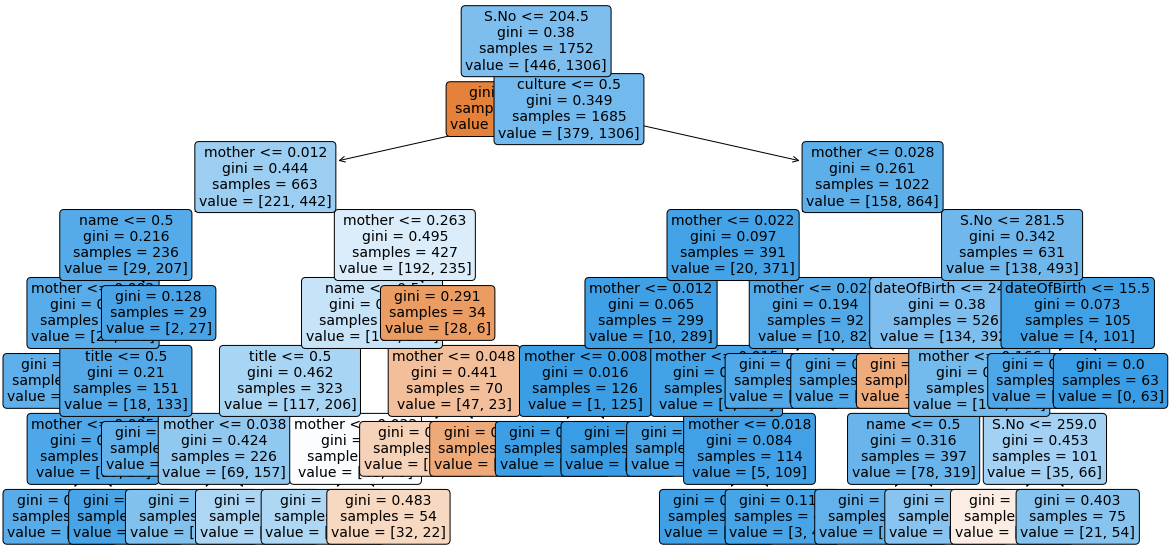

In [41]:
# setting figure size
plt.figure(figsize=(20, 10)) # adjusting to better fit the visual


# developing a plotted tree
plot_tree(decision_tree = pruned_tree_fit, # changing to pruned_tree_fit
          feature_names = got_c.columns,
          filled        = True, 
          rounded       = True, 
          fontsize      = 14)


# rendering the plot
plt.show()

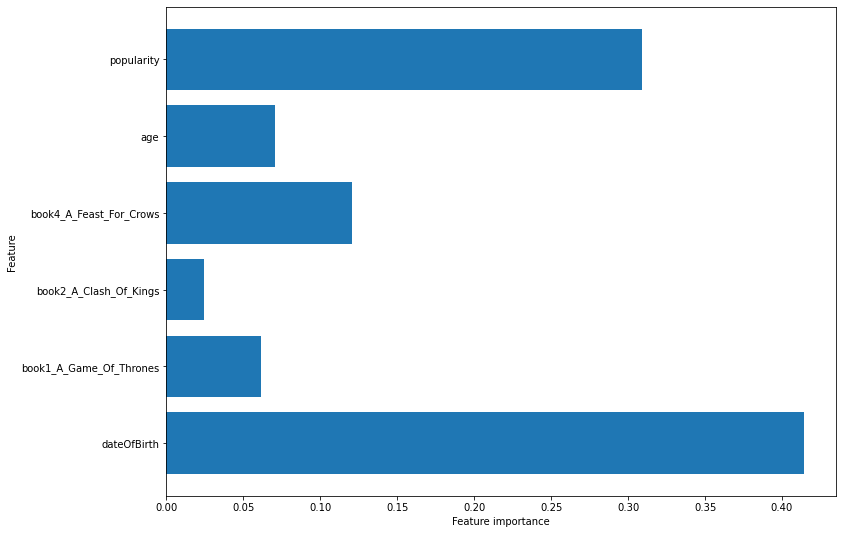

In [42]:
# plotting feature importance
plot_feature_importances(pruned_tree_fit,
                         train = x_train,
                         export = False)

In [43]:
# comparing results
print(f"""
Model         AUC Score      TN, FP, FN, TP
-----         ---------      --------------
Logistic      {logreg_auc_score}         {logreg_tn, logreg_fp, logreg_fn, logreg_tp}
Full Tree     {full_tree_auc_score}           {full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp}
Pruned Tree   {pruned_tree_auc_score}         {pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp}
""")


# creating a dictionary for model results
model_performance = {
    
    'Model Name'    : ['Logistic', 'Full Tree', 'Pruned Tree'],
           
    'AUC Score' : [logreg_auc_score, full_tree_auc_score, pruned_tree_auc_score],
    
    'Training Accuracy' : [logreg_train_score, full_tree_train_score,
                           pruned_tree_train_score],
           
    'Testing Accuracy'  : [logreg_test_score, full_tree_test_score,
                           pruned_tree_test_score],

    'Confusion Matrix'  : [(logreg_tn, logreg_fp, logreg_fn, logreg_tp),
                           (full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp),
                           (pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp)]}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)


Model         AUC Score      TN, FP, FN, TP
-----         ---------      --------------
Logistic      0.6266         (13, 37, 1, 144)
Full Tree     0.7848           (34, 16, 16, 129)
Pruned Tree   0.8024         (34, 16, 16, 129)



In [44]:
########################################
# optimal_neighbors
########################################
def optimal_neighbors(x_data,
                      y_data,
                      standardize = True,
                      pct_test=0.10,
                      seed=219,
                      response_type='reg',
                      max_neighbors=20,
                      show_viz=True):
    """
Exhaustively compute training and testing results for KNN across
[1, max_neighbors]. Outputs the maximum test score and (by default) a
visualization of the results.
PARAMETERS
----------
x_data        : explanatory variable data
y_data        : response variable
standardize   : whether or not to standardize the x data, default True
pct_test      : test size for training and validation from (0,1), default 0.25
seed          : random seed to be used in algorithm, default 219
response_type : type of neighbors algorithm to use, default 'reg'
    Use 'reg' for regression (KNeighborsRegressor)
    Use 'class' for classification (KNeighborsClassifier)
max_neighbors : maximum number of neighbors in exhaustive search, default 20
show_viz      : display or surpress k-neigbors visualization, default True
"""    
    
    
    if standardize == True:
        # optionally standardizing x_data
        scaler             = StandardScaler()
        scaler.fit(x_data)
        x_scaled           = scaler.transform(x_data)
        x_scaled_df        = pd.DataFrame(x_scaled)
        x_data             = x_scaled_df



    # train-test split
    x_train, x_test, y_train, y_test = train_test_split(x_data,
                                                        y_data,
                                                        test_size = pct_test,
                                                        random_state = seed)


    # creating lists for training set accuracy and test set accuracy
    training_accuracy = []
    test_accuracy = []
    
    
    # setting neighbor range
    neighbors_settings = range(1, max_neighbors + 1)


    for n_neighbors in neighbors_settings:
        # building the model based on response variable type
        if response_type == 'reg':
            clf = KNeighborsRegressor(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)
            
        elif response_type == 'class':
            clf = KNeighborsClassifier(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)            
            
        else:
            print("Error: response_type must be 'reg' or 'class'")
        
        
        # recording the training set accuracy
        training_accuracy.append(clf.score(x_train, y_train))
    
        # recording the generalization accuracy
        test_accuracy.append(clf.score(x_test, y_test))


    # optionally displaying visualization
    if show_viz == True:
        # plotting the visualization
        fig, ax = plt.subplots(figsize=(12,8))
        plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
        plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
        plt.ylabel("Accuracy")
        plt.xlabel("n_neighbors")
        plt.legend()
        plt.show()
    
    
    # returning optimal number of neighbors
    print(f"The optimal number of neighbors is: {test_accuracy.index(max(test_accuracy))+1}")
    return test_accuracy.index(max(test_accuracy))+1


########################################
# visual_cm
########################################
def visual_cm(true_y, pred_y, labels = None):
    """
Creates a visualization of a confusion matrix.

PARAMETERS
----------
true_y : true values for the response variable
pred_y : predicted values for the response variable
labels : , default None
    """
    # visualizing the confusion matrix

    # setting labels
    lbls = labels
    

    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # heatmap
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')


    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()

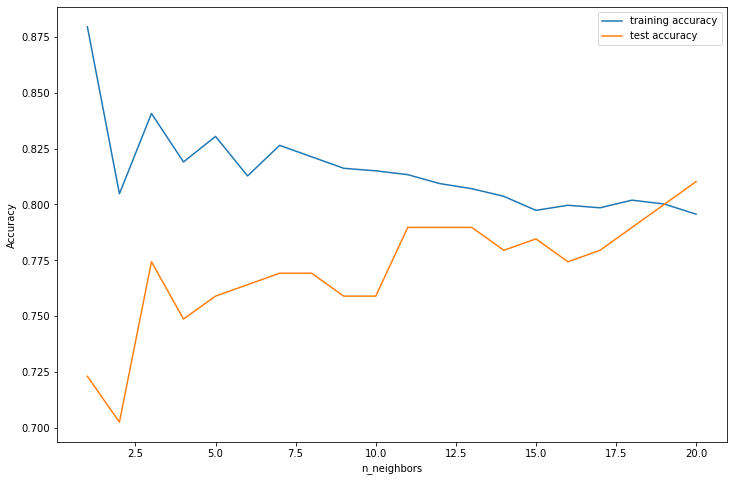

The optimal number of neighbors is: 20


In [45]:
# determining the optimal number of neighbors
opt_neighbors = optimal_neighbors(x_data        = got_data,
                                  y_data        = got_target,
                                  response_type = 'class')

In [46]:
# INSTANTIATING StandardScaler()
scaler = StandardScaler()


# FITTING the data
scaler.fit(got_data)


# TRANSFORMING the data
x_scaled     = scaler.transform(got_data)


# converting to a DataFrame
x_scaled_df  = pd.DataFrame(x_scaled) 


# train-test split with the scaled data
x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
            x_scaled_df,
            got_target,
            random_state = 219,
            test_size    = 0.10,
            stratify     = got_target)


# INSTANTIATING a KNN classification model with optimal neighbors
knn_opt = KNeighborsClassifier(n_neighbors = opt_neighbors)


# FITTING the training data
knn_fit = knn_opt.fit(x_train_scaled, y_train_scaled)


# PREDICTING based on the testing set
knn_pred = knn_fit.predict(x_test_scaled)


# SCORING the results
print('Training ACCURACY:', knn_fit.score(x_train_scaled, y_train_scaled).round(4))
print('Testing  ACCURACY:', knn_fit.score(x_test_scaled, y_test_scaled).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred).round(4))


# saving scoring data
knn_train_score = knn_fit.score(x_train_scaled, y_train_scaled).round(4)
knn_test_score  = knn_fit.score(x_test_scaled, y_test_scaled).round(4)


# saving AUC score
knn_auc_score   = roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred).round(4)

Training ACCURACY: 0.7951
Testing  ACCURACY: 0.8359
AUC Score        : 0.7455


In [47]:
# unpacking the confusion matrix
knn_tree_tn, \
knn_tree_fp, \
knn_tree_fn, \
knn_tree_tp = confusion_matrix(y_true = y_test, y_pred = knn_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {knn_tree_tn}
False Positives: {knn_tree_fp}
False Negatives: {knn_tree_fn}
True Positives : {knn_tree_tp}
""")


True Negatives : 28
False Positives: 22
False Negatives: 10
True Positives : 135



In [48]:
# train/test split with the logit_sig variables
got_data   =  got_c.loc[:, ['dateOfBirth', 'book1_A_Game_Of_Thrones', 
                           'book2_A_Clash_Of_Kings',
                           'book4_A_Feast_For_Crows',
                            'age','popularity' ]]
got_target =  got_c.loc[ : , 'isAlive']


# train/test split
x_train, x_test, y_train, y_test = train_test_split(
            got_data,
            got_target,
            random_state = 219,
            test_size    = 0.10,
            stratify     = got_target)

In [49]:
# INSTANTIATING a logistic regression model with default values
lr_default = LogisticRegression(solver = 'lbfgs',
                                C = 1.0,
                                warm_start = False,
                                random_state = 219)

In [50]:
# FITTING the training data
lr_default_fit = lr_default.fit(x_train, y_train)


# PREDICTING based on the testing set
lr_default_pred = lr_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', lr_default_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', lr_default_fit.score(x_test, y_test).round(4))


# SCORING with AUC
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = lr_default_pred).round(4))


# saving scoring data for future use
logreg_train_score = lr_default_fit.score(x_train, y_train).round(4) # accuracy
logreg_test_score  = lr_default_fit.score(x_test, y_test).round(4)   # accuracy


# saving AUC score
logreg_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = lr_default_pred).round(4)

Training ACCURACY: 0.7574
Testing  ACCURACY: 0.8051
AUC Score        : 0.6266


In [51]:
# INSTANTIATING a logistic regression model with default values
lr_default = LogisticRegression(solver = 'lbfgs',
                                C = 1.0,
                                warm_start = False,
                                random_state = 219)

In [52]:
#hyperparameter for logistic regression tuned
########################################
# RandomizedSearchCV
########################################

# declaring a hyperparameter space
#C_range          = np.arange(0.1, 5.0, 0.1)
#warm_start_range = [True, False]
#solver_range     = ['newton-cg', 'sag', 'lbfgs']


# creating a hyperparameter grid
#param_grid = {'C'          : C_range,
#              'warm_start' : warm_start_range,
#              'solver'     : solver_range}


# INSTANTIATING the model object without hyperparameters
#lr_tuned = LogisticRegression(random_state = 219,
#                              max_iter     = 1000) # increased for convergence


# GridSearchCV object
#lr_tuned_cv = RandomizedSearchCV(estimator           = lr_tuned,   # the model object
#                                 param_distributions = param_grid, # parameters to tune
#                                 cv                  = 3,          # how many folds in cross-validation
#                                 n_iter              = 250,        # number of combinations of hyperparameters to try
#                                 random_state        = 219,        # starting point for random sequence
#                                 scoring = make_scorer(
#                                           roc_auc_score,
#                                           needs_threshold = False)) # scoring criteria (AUC)


# FITTING to the FULL DATASET (due to cross-validation)
#lr_tuned_cv.fit(got_data, got_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
#print("Tuned Parameters  :", lr_tuned_cv.best_params_)
#print("Tuned CV AUC      :", lr_tuned_cv.best_score_.round(4))

In [53]:
# checking the best estimator for the model
#lr_tuned_cv.best_estimator_

In [54]:
# building a model based on hyperparameter tuning results

# INSTANTIATING a logistic regression model with tuned values
lr_tuned = LogisticRegression(C            = 3.0000000000000004,
                              warm_start   = True,
                              solver       = 'newton-cg',
                              max_iter     = 1000,
                              random_state = 219)


# FITTING the model to the full dataset
lr_tuned.fit(got_data, got_target) # this is ok because already tuned


# PREDICTING based on the testing set
lr_tuned_pred = lr_tuned.predict(x_test)


# SCORING the results
print('LR Tuned Training ACCURACY:', lr_tuned.score(x_train, y_train).round(4))
print('LR Tuned Testing  ACCURACY:', lr_tuned.score(x_test, y_test).round(4))
print('LR Tuned AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = lr_tuned_pred).round(4))


# saving scoring data for future use
lr_tuned_train_score = lr_tuned.score(x_train, y_train).round(4) # accuracy
lr_tuned_test_score  = lr_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
lr_tuned_auc         = roc_auc_score(y_true  = y_test,
                                     y_score = lr_tuned_pred).round(4) # auc

LR Tuned Training ACCURACY: 0.8059
LR Tuned Testing  ACCURACY: 0.8359
LR Tuned AUC Score        : 0.6931


In [55]:
# unpacking the confusion matrix
lr_tuned_tn, \
lr_tuned_fp, \
lr_tuned_fn, \
lr_tuned_tp = confusion_matrix(y_true = y_test, y_pred = lr_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {lr_tuned_tn}
False Positives: {lr_tuned_fp}
False Negatives: {lr_tuned_fn}
True Positives : {lr_tuned_tp}
""")


True Negatives : 20
False Positives: 30
False Negatives: 2
True Positives : 143



In [56]:
# declaring model performance objects
lr_train_acc = lr_tuned.score(x_train, y_train).round(4)
lr_test_acc  = lr_tuned.score(x_test, y_test).round(4)
lr_auc       = roc_auc_score(y_true  = y_test,
                             y_score = lr_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'        : 'Tuned LR',
                           'Training Accuracy' : lr_train_acc,
                           'Testing Accuracy'  : lr_test_acc,
                           'AUC Score'         : lr_auc,
                           'Confusion Matrix'  : (lr_tuned_tn,
                                                  lr_tuned_fp,
                                                  lr_tuned_fn,
                                                  lr_tuned_tp)},
                           ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.6266,0.7574,0.8051,"(13, 37, 1, 144)"
1,Full Tree,0.7848,0.8927,0.8359,"(34, 16, 16, 129)"
2,Pruned Tree,0.8024,0.8248,0.8718,"(34, 16, 16, 129)"
3,Tuned LR,0.6931,0.8059,0.8359,"(20, 30, 2, 143)"


In [57]:
#hyperparameter for tree 
# declaring a hyperparameter space
#criterion_range = ['gini', 'entropy']
#splitter_range  = ['best', 'random']
#depth_range     = np.arange(1, 25, 1)
#leaf_range      = np.arange(1, 100, 1)


# creating a hyperparameter grid
#param_grid = {'criterion'        : criterion_range,
#              'splitter'         : splitter_range,
#              'max_depth'        : depth_range,
#              'min_samples_leaf' : leaf_range}


# INSTANTIATING the model object without hyperparameters
#tuned_tree = DecisionTreeClassifier(random_state = 219)


# RandomizedSearchCV object
#tuned_tree_cv = RandomizedSearchCV(estimator             = tuned_tree,
#                                   param_distributions   = param_grid,
#                                   cv                    = 3,
#                                   n_iter                = 1000,
#                                   random_state          = 219,
#                                   scoring = make_scorer(roc_auc_score,
#                                             needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
#tuned_tree_cv.fit(got_data, got_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
#print("Tuned Parameters  :", tuned_tree_cv.best_params_)
#print("Tuned Training AUC:", tuned_tree_cv.best_score_.round(4))

In [58]:
# building a model based on hyperparameter tuning results

# INSTANTIATING a logistic regression model with tuned values
tree_tuned = DecisionTreeClassifier(splitter         = 'random',
                                    min_samples_leaf = 2,
                                    max_depth        = 8, #real value from the hyperparameter was 14 
                                    criterion        = 'gini',
                                    random_state     = 219)


# FITTING to the FULL DATASET (due to cross-validation)
tree_tuned_fit = tree_tuned.fit(got_data, got_target)


# PREDICTING based on the testing set
tree_tuned_pred = tree_tuned.predict(x_test)


# SCORING the results
print('Training ACCURACY:', tree_tuned.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', tree_tuned.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = tree_tuned_pred).round(4))


# saving scoring data for future use
tree_tuned_train_score = tree_tuned.score(x_train, y_train).round(4) # accuracy
tree_tuned_test_score  = tree_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
tree_tuned_auc         = roc_auc_score(y_true  = y_test,
                                       y_score = tree_tuned_pred).round(4) # auc

Training ACCURACY: 0.8191
Testing  ACCURACY: 0.8821
AUC Score        : 0.8028


In [59]:
# unpacking the confusion matrix
tuned_tree_tn, \
tuned_tree_fp, \
tuned_tree_fn, \
tuned_tree_tp = confusion_matrix(y_true = y_test, y_pred = tree_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tuned_tree_tn}
False Positives: {tuned_tree_fp}
False Negatives: {tuned_tree_fn}
True Positives : {tuned_tree_tp}
""")


True Negatives : 32
False Positives: 18
False Negatives: 5
True Positives : 140



In [60]:
# declaring model performance objects
tree_train_acc = tree_tuned.score(x_train, y_train).round(4)
tree_test_acc  = tree_tuned.score(x_test, y_test).round(4)
tree_auc       = roc_auc_score(y_true  = y_test,
                              y_score = tree_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'        : 'Tuned Tree',
                           'Training Accuracy' : tree_train_acc,
                           'Testing Accuracy'  : tree_test_acc,
                           'AUC Score'         : tree_auc,
                           'Confusion Matrix'  : (tuned_tree_tn,
                                                  tuned_tree_fp,
                                                  tuned_tree_fn,
                                                  tuned_tree_tp)},
                           ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.6266,0.7574,0.8051,"(13, 37, 1, 144)"
1,Full Tree,0.7848,0.8927,0.8359,"(34, 16, 16, 129)"
2,Pruned Tree,0.8024,0.8248,0.8718,"(34, 16, 16, 129)"
3,Tuned LR,0.6931,0.8059,0.8359,"(20, 30, 2, 143)"
4,Tuned Tree,0.8028,0.8191,0.8821,"(32, 18, 5, 140)"


In [61]:
########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

In [62]:
# train/test split with the logit_sig variables
got_data   =  got_c.loc[:, ['dateOfBirth', 'book1_A_Game_Of_Thrones', 
                           'book2_A_Clash_Of_Kings',
                           'book4_A_Feast_For_Crows',
                            'age','popularity' ]]
got_target =  got_c.loc[ : , 'isAlive']


# train/test split
x_train, x_test, y_train, y_test = train_test_split(
            got_data,
            got_target,
            random_state = 219,
            test_size    = 0.10,
            stratify     = got_target)

In [63]:
# INSTANTIATING a random forest model with default values
rf_default = RandomForestClassifier(n_estimators     = 100,
                                    criterion        = 'gini',
                                    max_depth        = None,
                                    min_samples_leaf = 1,
                                    bootstrap        = True,
                                    warm_start       = False,
                                    random_state     = 219)

In [64]:
# FITTING the training data
rf_default_fit = rf_default.fit(x_train, y_train)


# PREDICTING based on the testing set
rf_default_fit_pred = rf_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', rf_default_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', rf_default_fit.score(x_test, y_test).round(4))


# saving AUC score
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = rf_default_fit_pred).round(4))

Training ACCURACY: 0.8927
Testing  ACCURACY: 0.8462
AUC Score        : 0.7917


In [65]:
# unpacking the confusion matrix
rf_tn, \
rf_fp, \
rf_fn, \
rf_tp = confusion_matrix(y_true = y_test, y_pred = rf_default_fit_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {rf_tn}
False Positives: {rf_fp}
False Negatives: {rf_fn}
True Positives : {rf_tp}
""")


True Negatives : 34
False Positives: 16
False Negatives: 14
True Positives : 131



In [66]:
# declaring model performance objects
rf_train_acc = rf_default_fit.score(x_train, y_train).round(4)
rf_test_acc  = rf_default_fit.score(x_test, y_test).round(4)
rf_auc       = roc_auc_score(y_true  = y_test,
                             y_score = rf_default_fit_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'         : 'Random Forest',
                           'Training Accuracy'  : rf_train_acc,
                           'Testing Accuracy'   : rf_test_acc,
                           'AUC Score'          : rf_auc,
                           'Confusion Matrix'   : (rf_tn,
                                                   rf_fp,
                                                   rf_fn,
                                                   rf_tp)},
                          ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.6266,0.7574,0.8051,"(13, 37, 1, 144)"
1,Full Tree,0.7848,0.8927,0.8359,"(34, 16, 16, 129)"
2,Pruned Tree,0.8024,0.8248,0.8718,"(34, 16, 16, 129)"
3,Tuned LR,0.6931,0.8059,0.8359,"(20, 30, 2, 143)"
4,Tuned Tree,0.8028,0.8191,0.8821,"(32, 18, 5, 140)"
5,Random Forest,0.7917,0.8927,0.8462,"(34, 16, 14, 131)"


In [67]:
#getting hyperparameter to get the best values for the random forest
# FITTING the training data
#rf_default_fit = rf_default.fit(x_train, y_train)


# PREDICTING based on the testing set
#rf_default_fit_pred = rf_default_fit.predict(x_test)


# declaring a hyperparameter space
#estimator_range  = np.arange(100, 1100, 250)
#leaf_range       = np.arange(1, 31, 10)
#criterion_range  = ['gini', 'entropy']
#bootstrap_range  = [True, False]
#warm_start_range = [True, False]


# creating a hyperparameter grid
#param_grid = {'n_estimators'     : estimator_range,
#              'min_samples_leaf' : leaf_range,
#              'criterion'        : criterion_range,
#              'bootstrap'        : bootstrap_range,
#              'warm_start'       : warm_start_range}


# INSTANTIATING the model object without hyperparameters
#forest_grid = RandomForestClassifier(random_state = 219)


# GridSearchCV object
#forest_cv = RandomizedSearchCV(estimator           = forest_grid,
#                               param_distributions = param_grid,
#                               cv         = 3,
#                               n_iter     = 1000,
#                               scoring    = make_scorer(roc_auc_score,
#                                            needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
#forest_cv.fit(got_data, got_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
#print("Tuned Parameters  :", forest_cv.best_params_)
#print("Tuned Training AUC:", forest_cv.best_score_.round(4))

In [68]:
# best estimators based on RandomizedSearchCV
#forest_cv.best_estimator_

In [69]:
# building a model based on hyperparameter tuning results

# INSTANTIATING with best_estimator
forest_tuned = RandomForestClassifier(criterion        = 'entropy',
                                      min_samples_leaf = 1,
                                      n_estimators     = 100,
                                      warm_start       = True,
                                      bootstrap        = False,
                                      random_state     = 219)


# FITTING to the FULL DATASET (due to cross-validation)
forest_tuned_fit = forest_tuned.fit(got_data, got_target)


# PREDICTING based on the testing set
forest_tuned_pred = forest_tuned_fit.predict(x_test)


# SCORING the results
print('Forest Tuned Training ACCURACY:', forest_tuned.score(x_train, y_train).round(4))
print('Forest Tuned Testing  ACCURACY:', forest_tuned.score(x_test, y_test).round(4))
print('Forest Tuned AUC Score        :', roc_auc_score(y_true  = y_test,
                                                       y_score = forest_tuned_pred).round(4))


# saving scoring data for future use
forest_tuned_train_score = forest_tuned.score(x_train, y_train).round(4) # accuracy
forest_tuned_test_score  = forest_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
forest_tuned_auc = roc_auc_score(y_true  = y_test,
                                 y_score = forest_tuned_pred).round(4) # auc

Forest Tuned Training ACCURACY: 0.8916
Forest Tuned Testing  ACCURACY: 0.9282
Forest Tuned AUC Score        : 0.9059


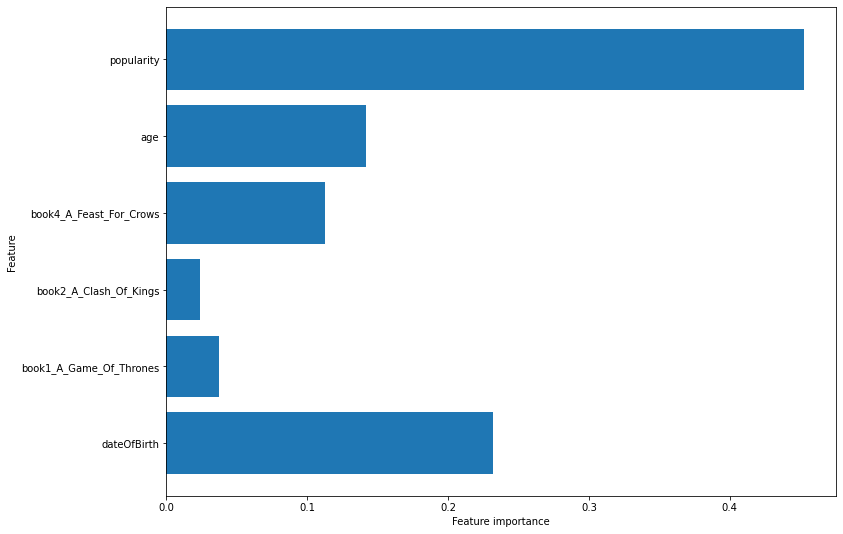

In [70]:
# plotting feature importances
plot_feature_importances(forest_tuned_fit,
                         train = x_train,
                         export = False)

In [71]:
# unpacking the confusion matrix
tuned_rf_tn, \
tuned_rf_fp, \
tuned_rf_fn, \
tuned_rf_tp = confusion_matrix(y_true = y_test, y_pred = forest_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tuned_rf_tn}
False Positives: {tuned_rf_fp}
False Negatives: {tuned_rf_fn}
True Positives : {tuned_rf_tp}
""")


True Negatives : 43
False Positives: 7
False Negatives: 7
True Positives : 138



In [72]:
# declaring model performance objects
tuned_rf_train_acc = forest_tuned_fit.score(x_train, y_train).round(4)
tuned_rf_test_acc  = forest_tuned_fit.score(x_test, y_test).round(4)
tuned_rf_auc       = roc_auc_score(y_true  = y_test,
                                   y_score = forest_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'         : 'Tuned Random Forest (Full)',
                           'Training Accuracy'  : tuned_rf_train_acc,
                           'Testing Accuracy'   : tuned_rf_test_acc,
                           'AUC Score'          : tuned_rf_auc,
                           'Confusion Matrix'   : (tuned_rf_tn,
                                                   tuned_rf_fp,
                                                   tuned_rf_fn,
                                                   tuned_rf_tp)},
                          ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.6266,0.7574,0.8051,"(13, 37, 1, 144)"
1,Full Tree,0.7848,0.8927,0.8359,"(34, 16, 16, 129)"
2,Pruned Tree,0.8024,0.8248,0.8718,"(34, 16, 16, 129)"
3,Tuned LR,0.6931,0.8059,0.8359,"(20, 30, 2, 143)"
4,Tuned Tree,0.8028,0.8191,0.8821,"(32, 18, 5, 140)"
5,Random Forest,0.7917,0.8927,0.8462,"(34, 16, 14, 131)"
6,Tuned Random Forest (Full),0.9059,0.8916,0.9282,"(43, 7, 7, 138)"


In [73]:
# INSTANTIATING the model object without hyperparameters
full_gbm_default = GradientBoostingClassifier(loss          = 'deviance',
                                              learning_rate = 0.1,
                                              n_estimators  = 100,
                                              criterion     = 'friedman_mse',
                                              max_depth     = 3,
                                              warm_start    = False,
                                              random_state  = 219)


# FIT step is needed as we are not using .best_estimator
full_gbm_default_fit = full_gbm_default.fit(x_train, y_train)


# PREDICTING based on the testing set
full_gbm_default_pred = full_gbm_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', full_gbm_default_fit.score(x_train, y_train).round(4))
print('Testing ACCURACY :', full_gbm_default_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = full_gbm_default_pred).round(4))

Training ACCURACY: 0.8584
Testing ACCURACY : 0.8667
AUC Score        : 0.7728


In [74]:
# unpacking the confusion matrix
gbm_default_tn, \
gbm_default_fp, \
gbm_default_fn, \
gbm_default_tp = confusion_matrix(y_true = y_test, y_pred = full_gbm_default_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {gbm_default_tn}
False Positives: {gbm_default_fp}
False Negatives: {gbm_default_fn}
True Positives : {gbm_default_tp}
""")


True Negatives : 29
False Positives: 21
False Negatives: 5
True Positives : 140



In [75]:
# declaring model performance objects
gbm_train_acc = full_gbm_default_fit.score(x_train, y_train).round(4)
gbm_test_acc  = full_gbm_default_fit.score(x_test, y_test).round(4)
gbm_auc       = roc_auc_score(y_true  = y_test,
                              y_score = full_gbm_default_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'       : 'GBM (Full)',
                          'Training Accuracy' : gbm_train_acc,
                          'Testing Accuracy'  : gbm_test_acc,
                          'AUC Score'         : gbm_auc,
                          'Confusion Matrix'  : (gbm_default_tn,
                                                 gbm_default_fp,
                                                 gbm_default_fn,
                                                 gbm_default_tp)},
                          ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.6266,0.7574,0.8051,"(13, 37, 1, 144)"
1,Full Tree,0.7848,0.8927,0.8359,"(34, 16, 16, 129)"
2,Pruned Tree,0.8024,0.8248,0.8718,"(34, 16, 16, 129)"
3,Tuned LR,0.6931,0.8059,0.8359,"(20, 30, 2, 143)"
4,Tuned Tree,0.8028,0.8191,0.8821,"(32, 18, 5, 140)"
5,Random Forest,0.7917,0.8927,0.8462,"(34, 16, 14, 131)"
6,Tuned Random Forest (Full),0.9059,0.8916,0.9282,"(43, 7, 7, 138)"
7,GBM (Full),0.7728,0.8584,0.8667,"(29, 21, 5, 140)"


In [76]:
#hyperparameter for the GBM model

# declaring a hyperparameter space
#learn_range        = np.arange(0.1, 2.2, 0.5)
#estimator_range    = np.arange(100, 501, 25)
#depth_range        = np.arange(2, 11, 2)
#warm_start_range   = [True, False]

# creating a hyperparameter grid
#param_grid = {'learning_rate' : learn_range,
#              'max_depth'     : depth_range,
#              'n_estimators'  : estimator_range,
#              'warm_start'    : warm_start_range}


# INSTANTIATING the model object without hyperparameters
#full_gbm_grid = GradientBoostingClassifier(random_state = 219)


# GridSearchCV object
#full_gbm_cv = RandomizedSearchCV(estimator     = full_gbm_grid,
#                           param_distributions = param_grid,
#                           cv                  = 3,
#                           n_iter              = 500,
#                           random_state        = 219,
#                           scoring             = make_scorer(roc_auc_score,
#                                                 needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
#full_gbm_cv.fit(got_data, got_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
#print("Tuned Parameters  :", full_gbm_cv.best_params_)
#print("Tuned Training AUC:", full_gbm_cv.best_score_.round(4))

In [77]:
# checking the best estimator for the model
#full_gbm_cv.best_estimator_

In [78]:
# INSTANTIATING with best_estimator values
gbm_tuned = GradientBoostingClassifier(learning_rate = 0.6,
                                       max_depth     = 2,
                                       n_estimators  = 350,
                                       warm_start    = True,
                                       random_state  = 219)


# FITTING to the FULL DATASET (due to cross-validation)
gbm_tuned_fit = gbm_tuned.fit(got_data, got_target)


# PREDICTING based on the testing set
gbm_tuned_pred = gbm_tuned_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', gbm_tuned_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', gbm_tuned_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = gbm_tuned_pred).round(4))

Training ACCURACY: 0.8733
Testing  ACCURACY: 0.9231
AUC Score        : 0.8697


In [79]:
# unpacking the confusion matrix
gbm_tuned_tn, \
gbm_tuned_fp, \
gbm_tuned_fn, \
gbm_tuned_tp = confusion_matrix(y_true = y_test, y_pred = gbm_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {gbm_tuned_tn}
False Positives: {gbm_tuned_fp}
False Negatives: {gbm_tuned_fn}
True Positives : {gbm_tuned_tp}
""")


True Negatives : 38
False Positives: 12
False Negatives: 3
True Positives : 142



In [80]:
# declaring model performance objects
gbm_tunne_train_acc = gbm_tuned_fit.score(x_train, y_train).round(4)
gbm_tunne_test_acc  = gbm_tuned_fit.score(x_test, y_test).round(4)
gbm_tunne_auc       = roc_auc_score(y_true  = y_test,
                              y_score = gbm_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'        : 'Tuned GBM',
                          'Training Accuracy'  : gbm_tunne_train_acc,
                          'Testing Accuracy'   : gbm_tunne_test_acc,
                          'AUC Score'          : gbm_tunne_auc,
                          'Confusion Matrix'   : (gbm_tuned_tn,
                                                  gbm_tuned_fp,
                                                  gbm_tuned_fn,
                                                  gbm_tuned_tp)},
                          ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.6266,0.7574,0.8051,"(13, 37, 1, 144)"
1,Full Tree,0.7848,0.8927,0.8359,"(34, 16, 16, 129)"
2,Pruned Tree,0.8024,0.8248,0.8718,"(34, 16, 16, 129)"
3,Tuned LR,0.6931,0.8059,0.8359,"(20, 30, 2, 143)"
4,Tuned Tree,0.8028,0.8191,0.8821,"(32, 18, 5, 140)"
5,Random Forest,0.7917,0.8927,0.8462,"(34, 16, 14, 131)"
6,Tuned Random Forest (Full),0.9059,0.8916,0.9282,"(43, 7, 7, 138)"
7,GBM (Full),0.7728,0.8584,0.8667,"(29, 21, 5, 140)"
8,Tuned GBM,0.8697,0.8733,0.9231,"(38, 12, 3, 142)"


In [81]:
model_performance.sort_values(by = 'AUC Score',
                              ascending = False)

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
6,Tuned Random Forest (Full),0.9059,0.8916,0.9282,"(43, 7, 7, 138)"
8,Tuned GBM,0.8697,0.8733,0.9231,"(38, 12, 3, 142)"
4,Tuned Tree,0.8028,0.8191,0.8821,"(32, 18, 5, 140)"
2,Pruned Tree,0.8024,0.8248,0.8718,"(34, 16, 16, 129)"
5,Random Forest,0.7917,0.8927,0.8462,"(34, 16, 14, 131)"
1,Full Tree,0.7848,0.8927,0.8359,"(34, 16, 16, 129)"
7,GBM (Full),0.7728,0.8584,0.8667,"(29, 21, 5, 140)"
3,Tuned LR,0.6931,0.8059,0.8359,"(20, 30, 2, 143)"
0,Logistic,0.6266,0.7574,0.8051,"(13, 37, 1, 144)"


In [83]:
print(f"""
Model                             Train Score      Test Score      AUC Score       Confussion Matrix
-----                             -----------      ---------       ---------       -----------------
Log Regression                   {(logreg_train_score)}            {(logreg_test_score)}           {(logreg_auc_score)}         {logreg_tn}, {logreg_fp}, {logreg_fn}, {logreg_tp} 
Full Tree Regression             {(full_tree_train_score)}            {(full_tree_test_score)}           {(full_tree_auc_score)}         {full_tree_tn}, {full_tree_fp}, {full_tree_fn}, {full_tree_tp}
Pruned Tree Regression           {(pruned_tree_train_score)}            {(pruned_tree_test_score)}           {(pruned_tree_auc_score)}         {pruned_tree_tn}, {pruned_tree_fp}, {pruned_tree_fn}, {pruned_tree_tp}
Tuned LR                         {(lr_train_acc)}            {(lr_test_acc)}           {(lr_auc)}         {lr_tuned_tn}, {lr_tuned_fp}, {lr_tuned_fn}, {lr_tuned_tp}
Tuned Tree                       {(tree_train_acc)}            {(tree_test_acc)}           {(tree_auc)}         {tuned_tree_tn}, {tuned_tree_fp}, {tuned_tree_fn}, {tuned_tree_tp}
Random Forest                    {(rf_train_acc)}            {(rf_test_acc)}           {(rf_auc)}         {rf_tn}, {rf_fp}, {rf_fn}, {rf_tp}
Tuned Random Forest (Final Model){(tuned_rf_train_acc)}            {(tuned_rf_test_acc)}           {(tuned_rf_auc)}         {tuned_rf_tn}, {tuned_rf_fp}, {tuned_rf_fn}, {tuned_rf_tp}
GBM (Full)                       {(gbm_train_acc)}            {(gbm_test_acc)}           {(gbm_auc)}         {gbm_default_tn}, {gbm_default_fp}, {gbm_default_fn}, {gbm_default_tp}
Tuned GBM                        {(gbm_tunne_train_acc)}            {(gbm_tunne_test_acc)}           {(gbm_tunne_auc)}         {gbm_tuned_tn}, {gbm_tuned_fp}, {gbm_tuned_fn}, {gbm_tuned_tp}
KNN Regression                   {(knn_train_score)}            {(knn_test_score)}           {(knn_auc_score)}         {knn_tree_tn}, {knn_tree_fp}, {knn_tree_fn}, {knn_tree_tp}
""")


Model                             Train Score      Test Score      AUC Score       Confussion Matrix
-----                             -----------      ---------       ---------       -----------------
Log Regression                   0.7574            0.8051           0.6266         13, 37, 1, 144 
Full Tree Regression             0.8927            0.8359           0.7848         34, 16, 16, 129
Pruned Tree Regression           0.8248            0.8718           0.8024         34, 16, 16, 129
Tuned LR                         0.8059            0.8359           0.6931         20, 30, 2, 143
Tuned Tree                       0.8191            0.8821           0.8028         32, 18, 5, 140
Random Forest                    0.8927            0.8462           0.7917         34, 16, 14, 131
Tuned Random Forest (Final Model)0.8916            0.9282           0.9059         43, 7, 7, 138
GBM (Full)                       0.8584            0.8667           0.7728         29, 21, 5, 140
Tuned GBM 